In [ ]:
# DFT of xa(t)=sin(2π⋅1000t)+0.5sin(2π⋅2000t+4π). Also IDFT. DFT with
# window + window function realization.

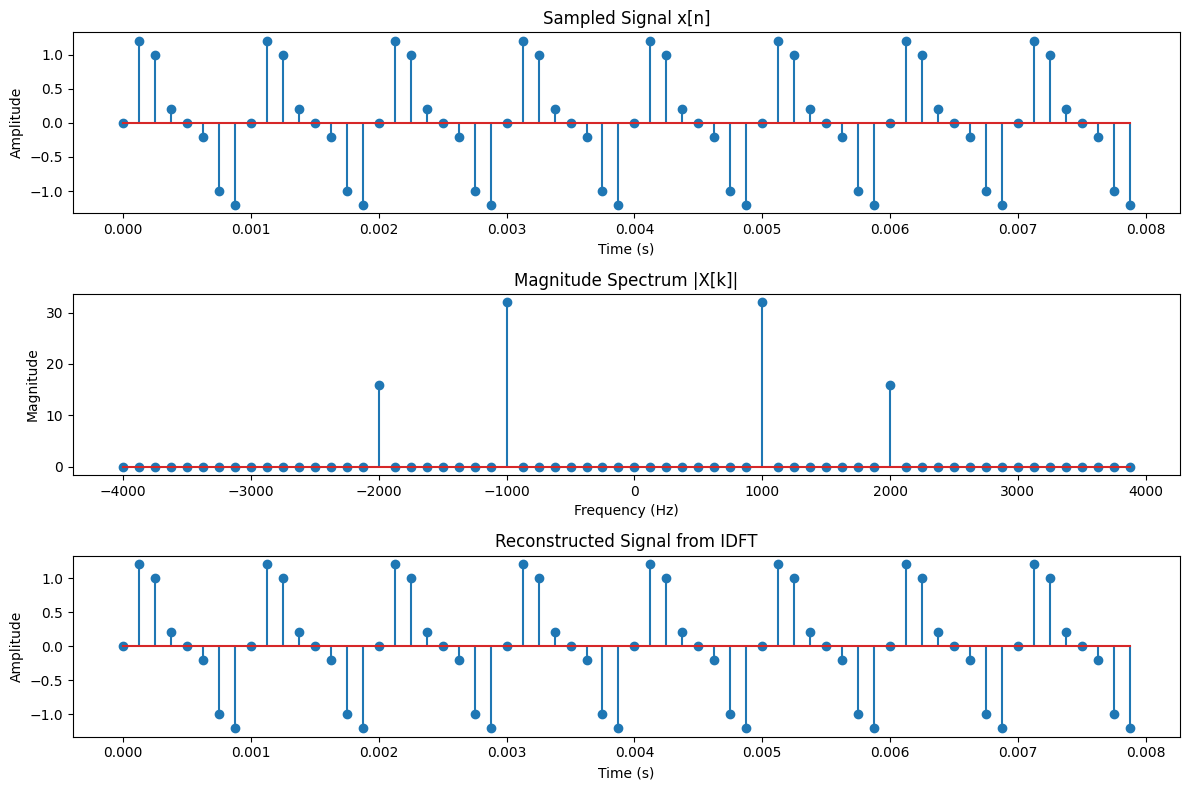

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 8000             # Sampling frequency (Hz)
N = 64                # Number of samples
t = np.arange(N) / fs # Time vector

# Original analog signal sampled
x = np.sin(2*np.pi*1000*t) + 0.5*np.sin(2*np.pi*2000*t + 4*np.pi)

# DFT
X = np.fft.fft(x)
X_mag = np.abs(X)

# IDFT (inverse DFT to recover signal)
x_reconstructed = np.fft.ifft(X)

# Plotting
plt.figure(figsize=(12, 8))

# Time-domain signal
plt.subplot(3, 1, 1)
plt.stem(t, x)
plt.title("Sampled Signal x[n]")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Magnitude spectrum
plt.subplot(3, 1, 2)
f = np.fft.fftfreq(N, d=1/fs)
# plt.stem(f[:N//2], X_mag[:N//2])
plt.stem(f, X_mag)
plt.title("Magnitude Spectrum |X[k]|")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Reconstructed signal
plt.subplot(3, 1, 3)
plt.stem(t, x_reconstructed.real)
plt.title("Reconstructed Signal from IDFT")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


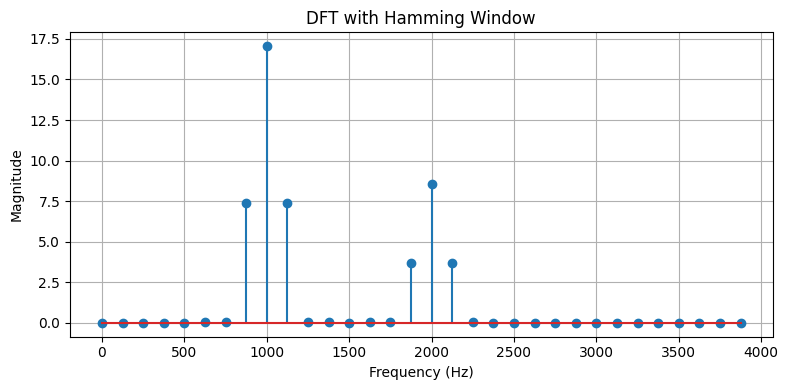

In [17]:
# Apply window
window = np.hamming(N)
x_windowed = x * window

# DFT of windowed signal
Xw = np.fft.fft(x_windowed)
Xw_mag = np.abs(Xw)

# Plot windowed magnitude spectrum
plt.figure(figsize=(8, 4))
plt.title("DFT with Hamming Window")
plt.stem(f[:N//2], Xw_mag[:N//2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()


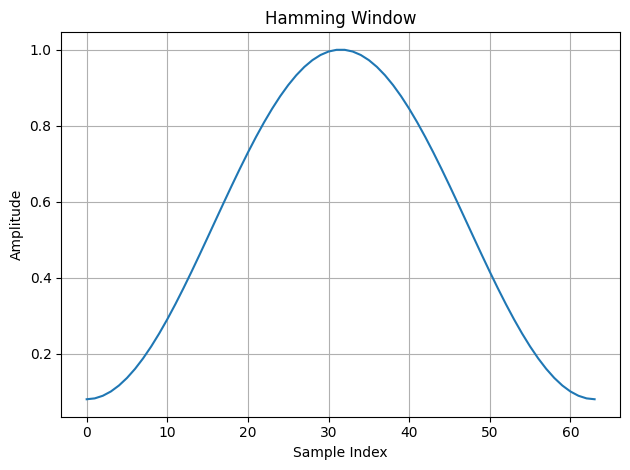

In [18]:
plt.figure()
plt.plot(window)
plt.title("Hamming Window")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


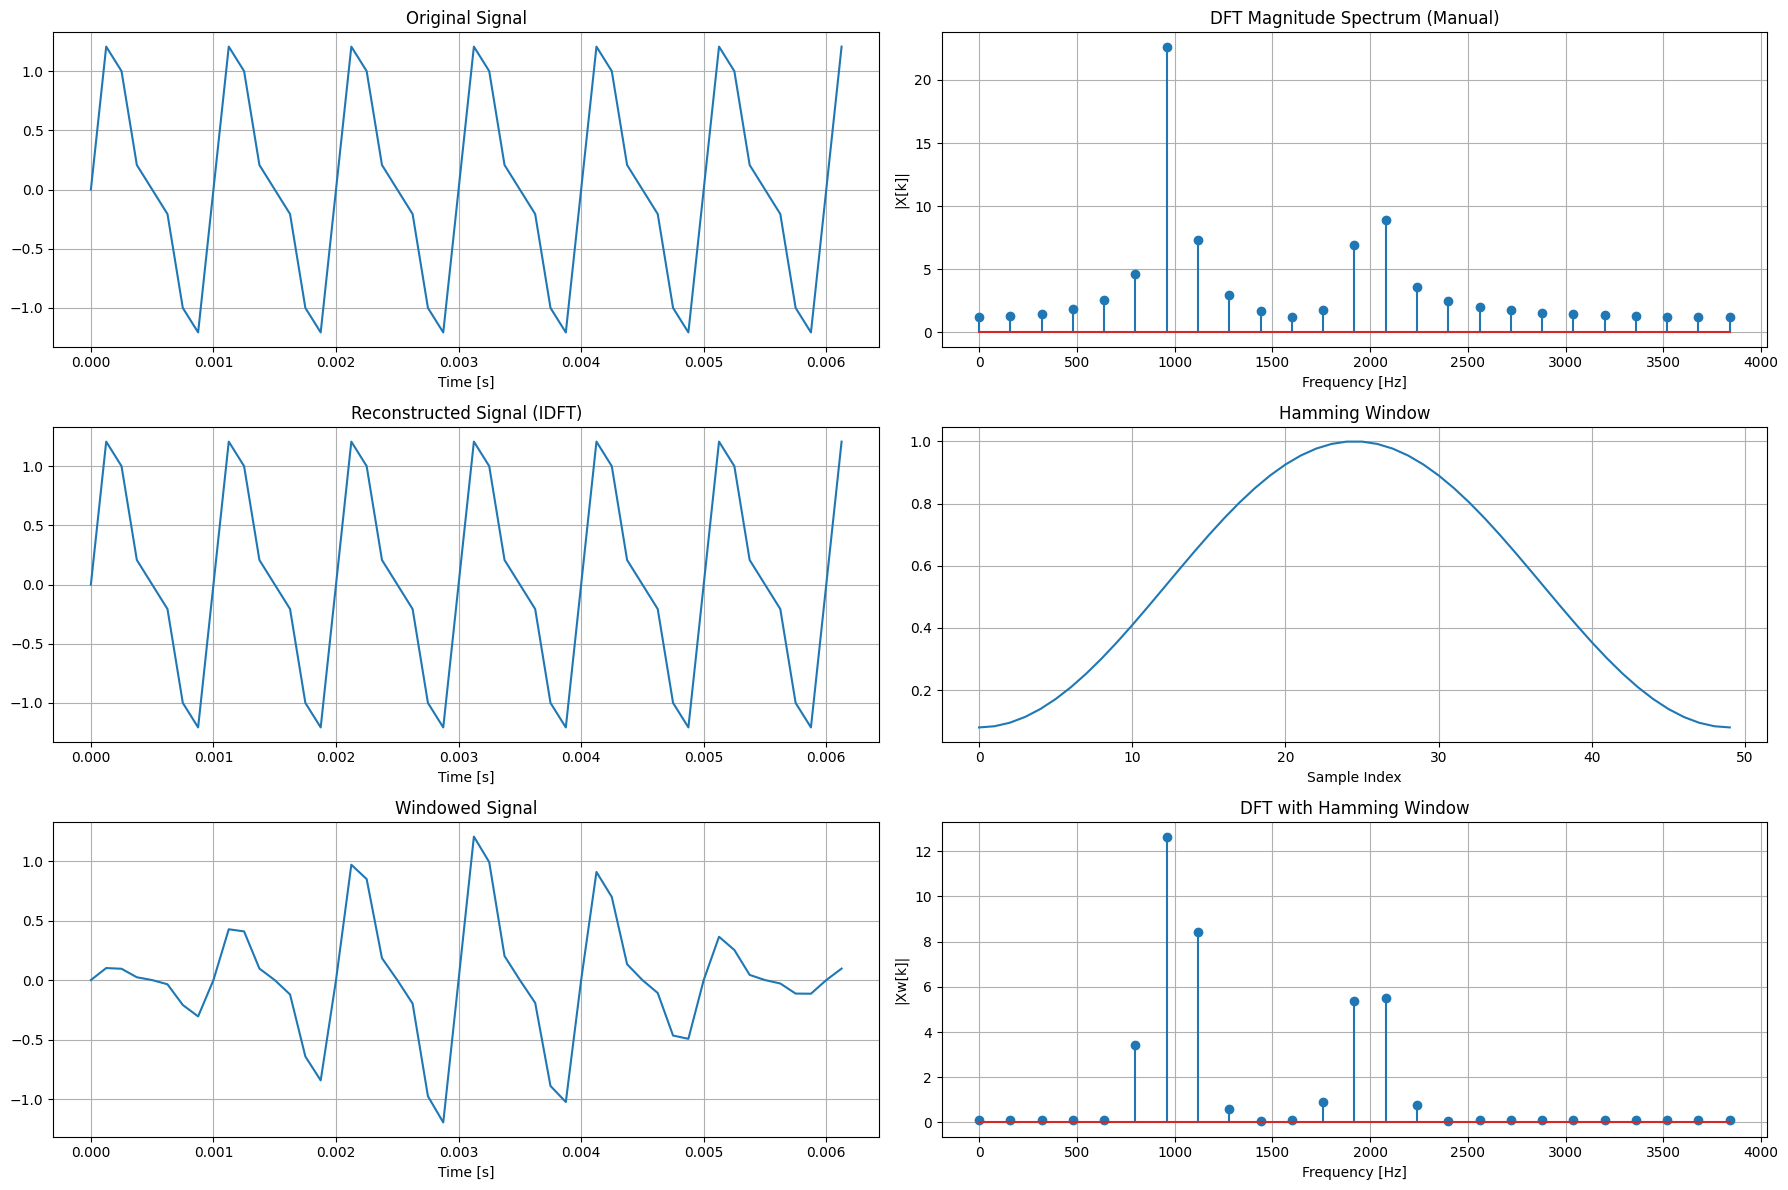

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Signal Parameters
fs = 8000           # Sampling frequency
# N=50
N = 64              # Number of samples
t = np.arange(N) / fs

# Step 2: Sample the signal
x = np.sin(2*np.pi*1000*t) + 0.5*np.sin(2*np.pi*2000*t)

# Step 3: Manual DFT
def DFT(x):
    N = len(x)
    X = []
    for k in range(N):
        s = 0
        for n in range(N):
            angle = -2j * np.pi * k * n / N
            s += x[n] * np.exp(angle)
        X.append(s)
        # print(X)
    return X

# Step 4: Manual IDFT
def IDFT(X):
    N = len(X)
    x_recon = []
    for n in range(N):
        s = 0
        for k in range(N):
            angle = 2j * np.pi * k * n / N
            s += X[k] * np.exp(angle)
        x_recon.append(s.real / N)
    return x_recon

# Step 5: Window (Hamming)
# Let’s compute values for N=5
# [0.08, 0.54, 1.0, 0.54, 0.08]

def hamming(N):
    return [0.54 - 0.46 * np.cos(2 * np.pi * n / (N-1)) for n in range(N)]

# Perform DFT and IDFT
X = DFT(x)
x_idft = IDFT(X)

# Apply window and compute windowed DFT
window = hamming(N)
x_windowed = x * window
Xw = DFT(x_windowed)

# Frequency axis
# dft can able to get 1500HZ

# 1. Sampling Frequency fsfs​

# You must follow the Nyquist theorem:
# fs≥2⋅fmax signal

# 2.Frequency Bin Resolution
# The spacing between DFT bins is:

# Δf=​fs/N​
# So, if you want 1500 Hz to appear exactly as a bin, then:
# 1500=k⋅(fs/N)

# f this kk is an integer, then yes — 1500 Hz aligns with a bin.


# Let’s say:

#     fs=8000 Hz

#     N=64

#     Then:

#         Δf= 8000 / 64= 125Hz

#         Frequency bins: [0, 125, 250, ..., 3875] Hz

# Can you hit 1500 Hz exactly?
# k=1500/125=12
# ✅ Yes! It's bin #12 → you can see 1500 Hz clearly.


f = np.arange(N) * fs / N

# Plotting
plt.figure(figsize=(18, 12))

# Original signal
plt.subplot(3, 2, 1)
plt.plot(t, x)
plt.title("Original Signal")
plt.xlabel("Time [s]")
plt.grid(True)

# DFT magnitude (manual)

# Why [:N//2]?
#     For a real-valued input signal, the DFT is symmetric around N/2.
#     The first half of X (from 0 to N/2) corresponds to positive frequencies.
#     The second half is the complex conjugate of the first half (negative frequencies).
#     So, to plot the magnitude spectrum, usually you only plot the first half to avoid redundancy.
# f[:N//2]	Frequencies from 0 Hz up to just below Nyquist (fs/2)
# X[:N//2]	Corresponding DFT complex coefficients for those frequencies
# np.abs(X[:N//2])	Magnitude (absolute value) of those complex coefficients

plt.subplot(3, 2, 2)
plt.stem(f[:N//2], np.abs(X[:N//2]))
plt.title("DFT Magnitude Spectrum (Manual)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("|X[k]|")
plt.grid(True)

# Reconstructed signal
plt.subplot(3, 2, 3)
plt.plot(t, x_idft)
plt.title("Reconstructed Signal (IDFT)")
plt.xlabel("Time [s]")
plt.grid(True)

# Hamming window plot
plt.subplot(3, 2, 4)
plt.plot(window)
plt.title("Hamming Window")
plt.xlabel("Sample Index")
plt.grid(True)

# Windowed signal
plt.subplot(3, 2, 5)
plt.plot(t, x_windowed)
plt.title("Windowed Signal")
plt.xlabel("Time [s]")
plt.grid(True)

# Windowed DFT magnitude
plt.subplot(3, 2, 6)
plt.stem(f[:N//2], np.abs(Xw[:N//2]))
plt.title("DFT with Hamming Window")
plt.xlabel("Frequency [Hz]")
plt.ylabel("|Xw[k]|")
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
# 1. Start with Euler's formula:
# e^(jθ)=cos⁡(θ)+jsin⁡(θ)


# 2. Represent cosine as sum of complex exponentials:

# cos(2πft)=(e^(j2πft)+e^(−j2πft)​)/2

# The first term, ej2πft, corresponds to positive frequency +f

# The second term, e−j2πft, corresponds to negative frequency −f

# Real signals like cosine are made from two complex exponentials rotating in opposite directions.